# Emotion Detection

+ The Data used in the project consist of 3 csv files for happy, sad and angry text reviews from people. The columns in dataset of each file is as follows:
  + content:       Contains actual review from people in text format
  + intensity:     This is the target variable. Contains 3 different sentiments such as happiness, sadness, angriness


+ The goal of this project is to develop an intelligent system using NLP to predict the intensity in the text reviews.

## Necessary Libraries

In [1]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import joblib

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()
import neattext.functions as nfx

from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ksank\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Collection

In [2]:
# Storing csv files to pandas DataFrame for happy,angry and sad emotions

happy_df = pd.read_csv(r"C:\Users\ksank\OneDrive\Desktop\Emotion-detection-NLP-project\data\happiness.csv")

angry_df = pd.read_csv(r"C:\Users\ksank\OneDrive\Desktop\Emotion-detection-NLP-project\data\angriness.csv")

sad_df = pd.read_csv(r"C:\Users\ksank\OneDrive\Desktop\Emotion-detection-NLP-project\data\sadness.csv")

## EDA & Feature Engineering

In [3]:
# Dispalying first 5 rows of happy dataframe
happy_df.head()

,content,intensity
0,Wants to know how the hell I can remember word...,happiness
1,Love is a long sweet dream & marriage is an al...,happiness
2,The world could be amazing when you are slight...,happiness
3,My secret talent is getting tired without doin...,happiness
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happiness


In [4]:
# Dispalying first 5 rows of angry dataframe
angry_df.head()

,content,intensity
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angriness
1,Not available for busy people☺,angriness
2,I do not exist to impress the world. I exist t...,angriness
3,Everything is getting expensive except some pe...,angriness
4,My phone screen is brighter than my future 🙁,angriness


In [5]:
# Dispalying first 5 rows of sad dataframe
sad_df.head()

,content,intensity
0,"Never hurt people who love you a lot, because ...",sadness
1,Don’t expect me to tell you what you did wrong...,sadness
2,I preferred walking away than fighting for you...,sadness
3,"Moving forward in life isn’t the hard part, it...",sadness
4,"Never cry for anyone in your life, because tho...",sadness


In [6]:
# Displaying shape of all Dataframes

print('happy_df shape is',happy_df.shape)
print('angry_df shape is',angry_df.shape)
print('sad_df shape is',sad_df.shape)

happy_df shape is (708, 2)
angry_df shape is (696, 2)
sad_df shape is (635, 2)


In [7]:
# Combining all Dataframes into single Dataframe

final_df = pd.concat([happy_df,angry_df,sad_df])

In [8]:
# Displaying first 5 and last 5 rows of combined Dataframe

final_df

,content,intensity
0,Wants to know how the hell I can remember word...,happiness
1,Love is a long sweet dream & marriage is an al...,happiness
2,The world could be amazing when you are slight...,happiness
3,My secret talent is getting tired without doin...,happiness
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happiness
...,...,...
630,Stop crying over yesterday and start smiling f...,sadness
631,An Eye with Dust ‘n A Heart with Trust Always ...,sadness
632,Tears come from the heart and not from the brain.,sadness
633,"Sometimes you have to hold your head up high, ...",sadness


In [1]:
# Saving combined Datadrame to csv file 

# final_df.to_csv(r'C:\Users\ksank\OneDrive\Desktop\Emotion-detection-NLP-project\data\combined_data.csv')

In [10]:
# Checking for null values in Dataframe

final_df.isna().sum()

content      0
intensity    0
dtype: int64

In [11]:
# Checking for duplicate values in Dataframe

final_df.duplicated().sum()

447

In [12]:
# Dropping duplicate values from DataFrame

final_df.drop_duplicates(inplace=True)

In [13]:
# Again checking for removal of Duplicate values and displaying shape of DataFrame

print(final_df.duplicated().sum())

print (final_df.shape)

0
(1592, 2)


In [14]:
# Checking value count of each class of 'intensity' column

final_df["intensity"].value_counts()

intensity
happiness    704
angriness    498
sadness      390
Name: count, dtype: int64

In [15]:
# Checking percentage of each class in 'intensity' column

final_df.intensity.value_counts() / final_df.shape[0] *100

intensity
happiness    44.221106
angriness    31.281407
sadness      24.497487
Name: count, dtype: float64

<Axes: title={'center': 'Count of each emotion'}, xlabel='intensity', ylabel='count'>

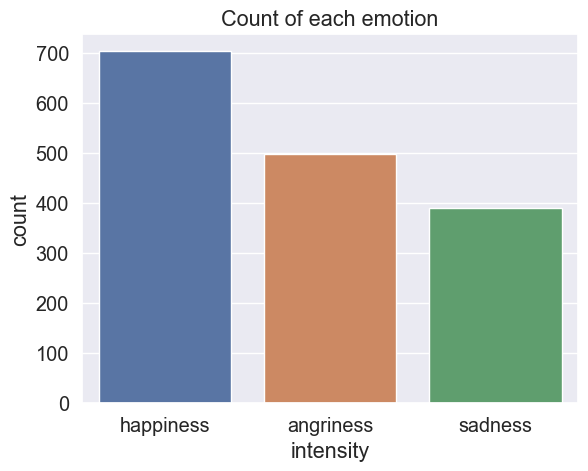

In [16]:
# Displaying count of values in each class of intensity column through countplot

plt.title("Count of each emotion")
plt.rcParams["figure.figsize"] = (8,6)
sns.countplot(x = final_df['intensity'], data = final_df)

In [17]:
# Creating new columns for character length and token length

final_df['char_length'] = final_df['content'].apply(lambda x : len(x))
final_df['token_length'] = final_df['content'].apply(lambda x : len(x.split(" ")))

In [18]:
final_df

,content,intensity,char_length,token_length
0,Wants to know how the hell I can remember word...,happiness,128,26
1,Love is a long sweet dream & marriage is an al...,happiness,57,12
2,The world could be amazing when you are slight...,happiness,57,10
3,My secret talent is getting tired without doin...,happiness,59,10
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happiness,57,8
...,...,...,...,...
630,Stop crying over yesterday and start smiling f...,sadness,58,9
631,An Eye with Dust ‘n A Heart with Trust Always ...,sadness,52,11
632,Tears come from the heart and not from the brain.,sadness,49,10
633,"Sometimes you have to hold your head up high, ...",sadness,85,16


C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


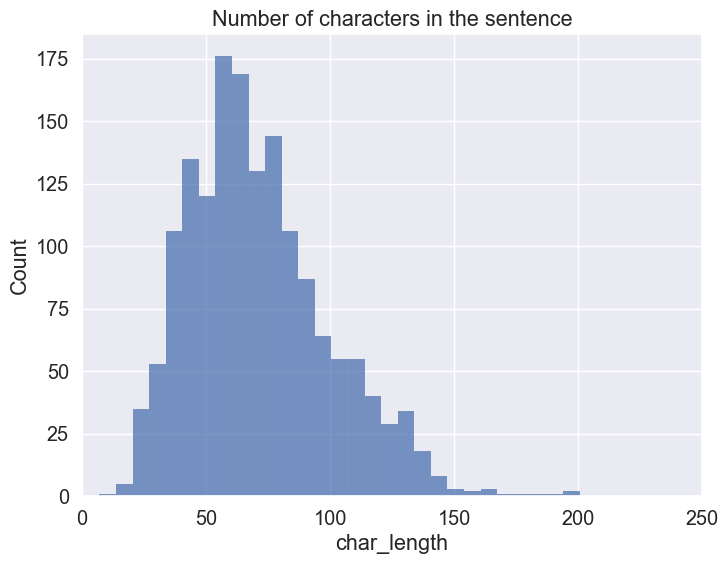

In [19]:
# Plotting Histogram for number of characters in the sentence

plt.title('Number of characters in the sentence')
sns.histplot(final_df['char_length'], )
plt.xlim(0,250)
plt.show()

C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


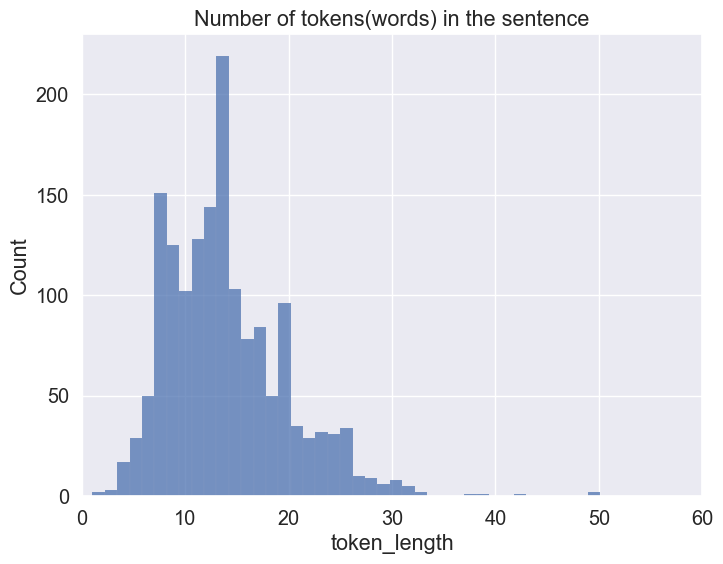

In [20]:
# Plotting Histogram for number of tokens(words) in the sentence

plt.title('Number of tokens(words) in the sentence')
sns.histplot(final_df['token_length'])
plt.xlim(0,60)
plt.show()

C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


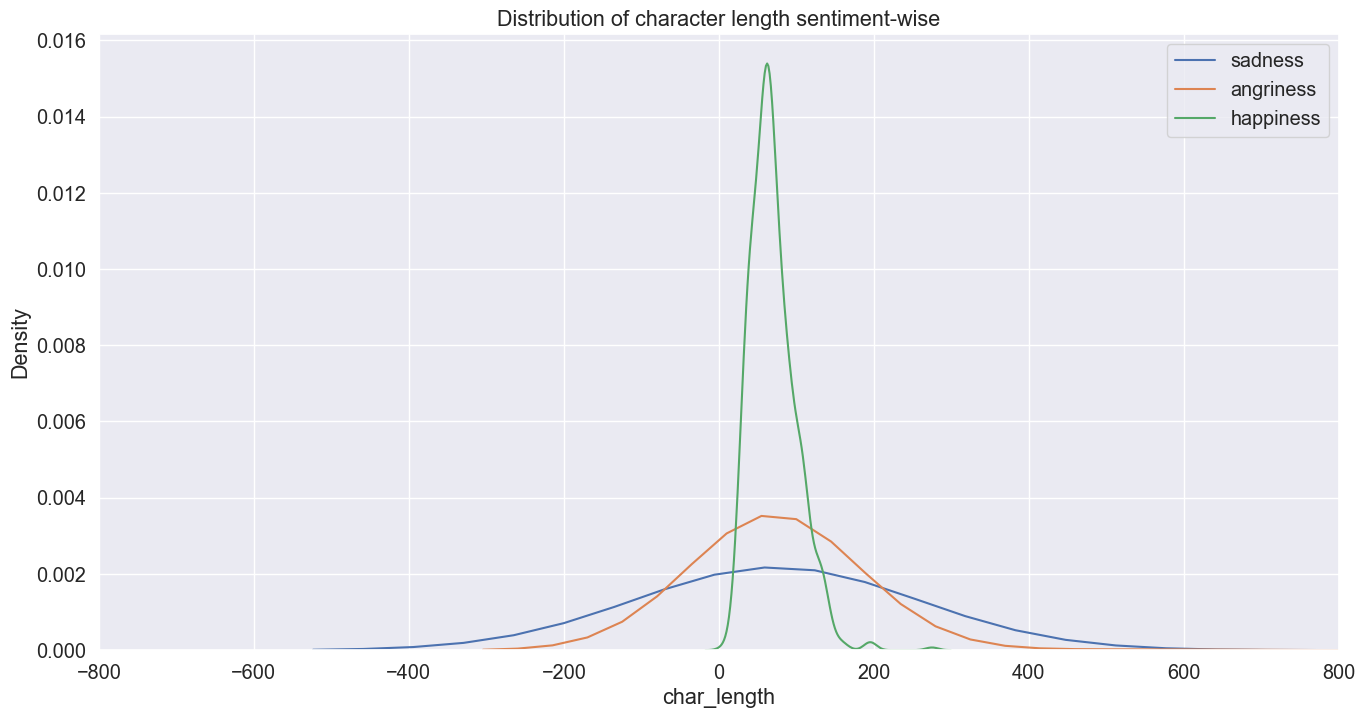

In [21]:
# Plotting KDE plot for sentiment wise character length distribution

fig, ax = plt.subplots(figsize=(16,8))
for intensity in final_df['intensity'].value_counts().sort_values().index.tolist():
    sns.kdeplot(final_df[final_df['intensity']==intensity]['char_length'],ax=ax, label=intensity)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise")
plt.xlim(-800,800)
plt.show()

C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ksank\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


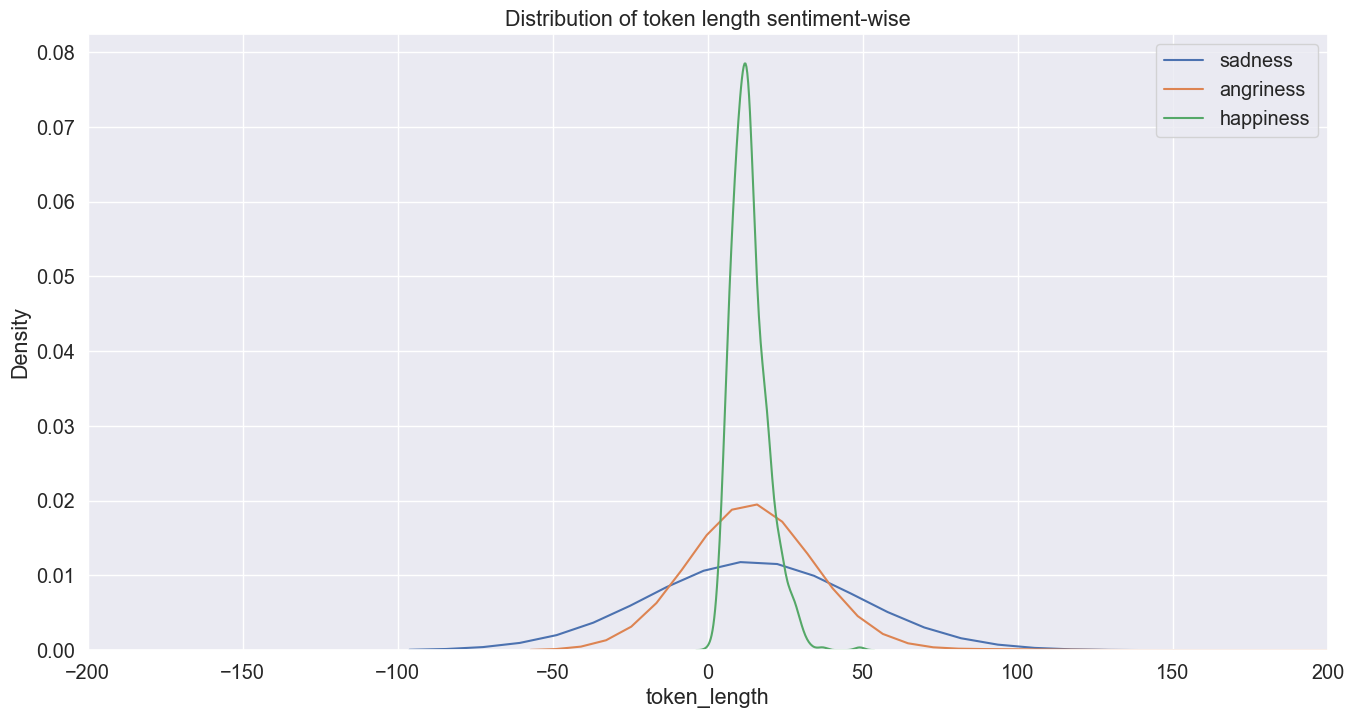

In [22]:
# Plotting KDE plot for sentiment wise token length distribution

fig, ax = plt.subplots(figsize=(16,8))
for intensity in final_df['intensity'].value_counts().sort_values().index.tolist():
    #print(sentiment)
    sns.kdeplot(final_df[final_df['intensity']==intensity]['token_length'],ax=ax, label=intensity)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise")
plt.xlim(-200,200)
plt.show()

In [23]:
avg_df = final_df.groupby('intensity').agg({'char_length':'mean', 'token_length':'mean'})

C:\Users\ksank\AppData\Local\Temp\ipykernel_15216\1455811741.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_df.index, rotation = 45)
C:\Users\ksank\AppData\Local\Temp\ipykernel_15216\1455811741.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(avg_df.index, rotation = 45)


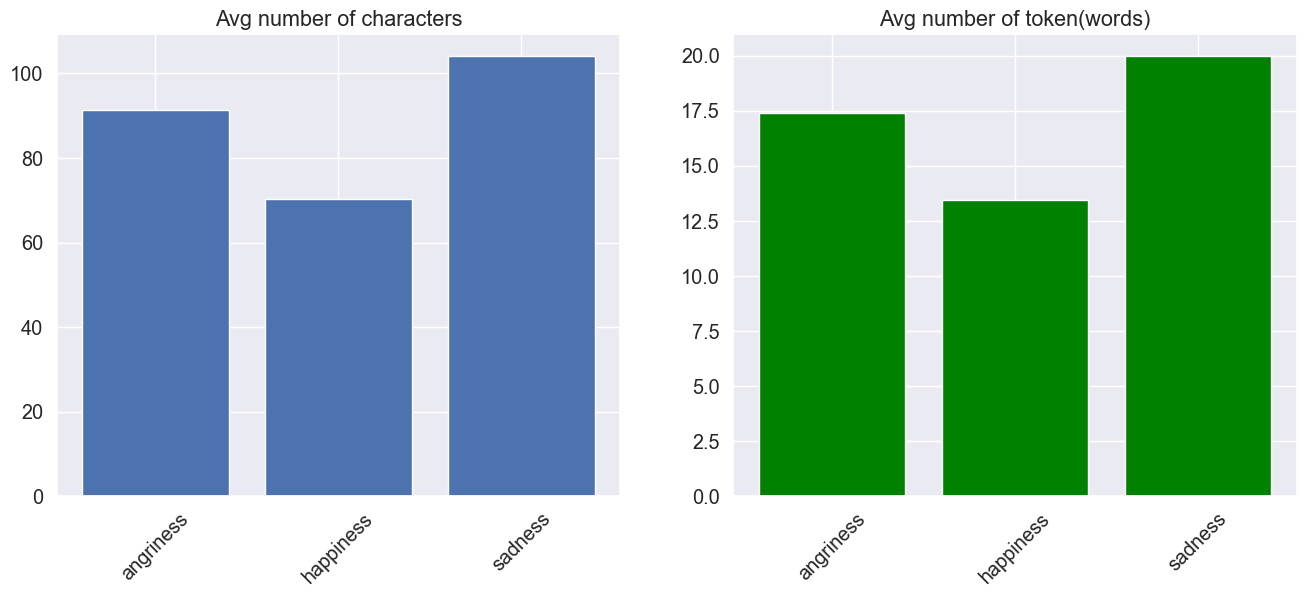

In [24]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

## Data Cleaning & Preprocessing

In [25]:
# Creating function for lemmatizing given text
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

# Creating function for removing stopwords from given text
def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

# Creating function for removing numbers from given text
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

# Creating function for making given text to lowercase
def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

# Creating function for removing punctuations from given text
def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

# Creating function for removing urls from given text
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Creating function for normalizing given text
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    df.content=df.content.apply(nfx.remove_emojis)
    return df

In [26]:
# Applying normalizing function on Dataframe

final_df= normalize_text(final_df)

In [27]:
# Displaying first 5 rows of normalized Dataframe

final_df.head()

,content,intensity,char_length,token_length
0,want know hell remember word song year ago can...,happiness,128,26
1,love long sweet dream marriage alarm clock,happiness,57,12
2,world could amazing slightly strange,happiness,57,10
3,secret talent getting tired without anything,happiness,59,10
4,khatarnaak whatsapp status ever… can ’t talk w...,happiness,57,8


## Train/Test Split

In [28]:
# Defining independent (X) variable and dependent (y) variable

X = final_df['content']
y = final_df['intensity']

In [29]:
# Splitting Data in to train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

## Model Training and Selection

In [30]:
def get_F1(trained_model,X,y):
    """
    Get the F1 score for the given model on the given data and targets.
    
    Parameters:
    trained_model (sklearn model): The trained model.
    X (list of str): The input data.
    y (list of str): The targets.
    
    Returns:
    array: The F1 score for each class.
    """
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

### Logistic Regression Model

In [31]:
#Train the model with the training data
log_reg = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('logreg', LogisticRegression(solver='liblinear',random_state = 10))])
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

#test the model with the test data
y_pred=log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=final_df.intensity.unique(), columns=['F1 score'])

Accuracy:  0.664576802507837 



,F1 score
happiness,0.686567
angriness,0.723127
sadness,0.492308


In [32]:
##Classification Report for Logistic Regression model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   angriness       0.68      0.69      0.69       100
   happiness       0.67      0.79      0.72       141
     sadness       0.62      0.41      0.49        78

    accuracy                           0.66       319
   macro avg       0.66      0.63      0.63       319
weighted avg       0.66      0.66      0.66       319



### Decision Tree Model

In [33]:
#Train the model with the training data
DT = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('DT', DecisionTreeClassifier(random_state=10))])
DT.fit(X_train, y_train)
DT.score(X_test, y_test)

#test the model with the test data
y_pred=DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(DT,X_test,y_test)
pd.DataFrame(f1_Score, index=final_df.intensity.unique(), columns=['F1 score'])

Accuracy:  0.6018808777429467 



,F1 score
happiness,0.642202
angriness,0.654135
sadness,0.454545


In [34]:
##Classification Report Decision Tree model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   angriness       0.59      0.70      0.64       100
   happiness       0.70      0.62      0.65       141
     sadness       0.46      0.45      0.45        78

    accuracy                           0.60       319
   macro avg       0.58      0.59      0.58       319
weighted avg       0.61      0.60      0.60       319



### Support Vector Machine Model

In [35]:
#Train the model with the training data
SVM = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC(kernel='rbf', C=10, random_state=10, probability=True))])
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)

#test the model with the test data
y_pred=SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(SVM,X_test,y_test)
pd.DataFrame(f1_Score, index=final_df.intensity.unique(), columns=['F1 score']) 

Accuracy:  0.6896551724137931 



,F1 score
happiness,0.747664
angriness,0.716312
sadness,0.549296


In [36]:
##Classification Report Support Vector Machine model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   angriness       0.70      0.80      0.75       100
   happiness       0.72      0.72      0.72       141
     sadness       0.61      0.50      0.55        78

    accuracy                           0.69       319
   macro avg       0.68      0.67      0.67       319
weighted avg       0.69      0.69      0.69       319



### Random Forest Model

In [37]:
#Train the model with the training data
RF = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('RF', RandomForestClassifier(n_estimators=50, random_state=10))])
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

#test the model with the test data
y_pred=RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(RF, X_test, y_test)
pd.DataFrame(f1_Score, index=final_df.intensity.unique(), columns=['F1 score']) 

Accuracy:  0.6865203761755486 



,F1 score
happiness,0.721649
angriness,0.732026
sadness,0.536232


In [38]:
##Classification Report Random Forest model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   angriness       0.74      0.70      0.72       100
   happiness       0.68      0.79      0.73       141
     sadness       0.62      0.47      0.54        78

    accuracy                           0.69       319
   macro avg       0.68      0.66      0.66       319
weighted avg       0.68      0.69      0.68       319



### K-Nearest Neighbours Model

In [39]:
#Train the model with the training data
KNN = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('KNN', KNeighborsClassifier())])
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

#test the model with the test data
y_pred=KNN.predict(X_test)

#calculate the accuracy
KNN_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', KNN_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(KNN, X_test, y_test)
pd.DataFrame(f1_Score, index=final_df.intensity.unique(), columns=['F1 score']) 

Accuracy:  0.6112852664576802 



,F1 score
happiness,0.618182
angriness,0.671378
sadness,0.474074


In [40]:
##Classification Report KNN model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   angriness       0.57      0.68      0.62       100
   happiness       0.67      0.67      0.67       141
     sadness       0.56      0.41      0.47        78

    accuracy                           0.61       319
   macro avg       0.60      0.59      0.59       319
weighted avg       0.61      0.61      0.61       319



### Multinomial Naive Bayes Model

In [41]:
#Train the model with the training data
MNB = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('NB', MultinomialNB())])
MNB.fit(X_train, y_train)
MNB.score(X_test, y_test)

#test the model with the test data
y_pred=MNB.predict(X_test)

#calculate the accuracy
MNB_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', MNB_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(KNN, X_test, y_test)
pd.DataFrame(f1_Score, index=final_df.intensity.unique(), columns=['F1 score']) 

Accuracy:  0.664576802507837 



,F1 score
happiness,0.618182
angriness,0.671378
sadness,0.474074


In [42]:
##Classification Report Multinomial Naive Bayes model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   angriness       0.71      0.64      0.67       100
   happiness       0.64      0.84      0.72       141
     sadness       0.68      0.38      0.49        78

    accuracy                           0.66       319
   macro avg       0.68      0.62      0.63       319
weighted avg       0.67      0.66      0.65       319



In [43]:
# Creating Dataframe for Accuracy of various models and sorting in descending order

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest', 'K-nearest neighbours', 'Multinomial Naive bayes'],
    'Accuracy': [log_reg_accuracy.round(2), DT_accuracy.round(2), SVM_accuracy.round(2), RF_accuracy.round(2), KNN_accuracy.round(2), MNB_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Support Vector Machine,0.69
1,Random Forest,0.69
2,Logistic Regression,0.66
3,Multinomial Naive bayes,0.66
4,K-nearest neighbours,0.61
5,Decision Tree,0.60


## Hyperparameters Tuning

### Random Forest Model Hyperparameters Tuning

In [45]:
# Creating Hyperparameters dictionary for Random Forest model

RF_param_dict = {
 'RF__criterion': ['gini', 'entropy'],
 'RF__max_depth': [2,4,8,10,12,14,16,18,20],
 'RF__min_samples_leaf': [2,3,4,5,6,7],
 'RF__n_estimators': [40,45,50,55,60]
}

In [46]:
# Applying Gridsearch function on model and fitting it on training data

grid_RF = GridSearchCV(RF, param_grid=RF_param_dict, cv=5, verbose=1, n_jobs=-1, scoring= 'accuracy')

grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('RF',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=10))]),
             n_jobs=-1,
             param_grid={'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [2, 4, 8, 10, 12, 14, 16, 18, 20],
                         'RF__min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'RF__n_estimators': [40, 45, 50, 55, 60]},
             scoring='accuracy', verbose=1)

In [47]:
# Displaying best parameters 

grid_RF.best_params_

{'RF__criterion': 'entropy',
 'RF__max_depth': 20,
 'RF__min_samples_leaf': 2,
 'RF__n_estimators': 50}

In [49]:
# Getting best estimator for the model

grid_RF.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('RF',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=10))])

In [50]:
# Training model with parameters obtained from Hyperparameter tuning

RF_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('RF_tuned', RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,n_estimators=50, random_state=10))])
RF_tuned.fit(X_train, y_train)
RF_tuned.score(X_test, y_test)

0.5893416927899686

### Support Vector Machine Model Hyperparameters tuning

In [51]:
# Creating Hyperparameters dictionary for Support Vector Machine model

SVM_param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],  
                  'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                  'svc__kernel': ['rbf', 'poly', 'sigmoid']}

In [52]:
# Applying Gridsearch function on model and fitting it on training data

grid_SVM = GridSearchCV(SVM, param_grid=SVM_param_grid, cv=5, verbose=1, n_jobs=-1, scoring= 'accuracy')

grid_SVM.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc',
                                        SVC(C=10, probability=True,
                                            random_state=10))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [53]:
# Displaying best parameters 

grid_SVM.best_params_

{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

In [54]:
# Getting best estimator for the model

grid_SVM.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc',
                 SVC(C=100, gamma=1, probability=True, random_state=10))])

In [55]:
# Training model with parameters obtained from Hyperparameter tuning

SVM_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC(kernel='rbf', C=100, gamma=1, random_state=10, probability=True))])
SVM_tuned.fit(X_train, y_train)
SVM_tuned.score(X_test, y_test)

0.6896551724137931

In [56]:
# Creating Hyperparameters dictionary for Logistic Regression model

logreg_param_grid = {'logreg__penalty': ['l1','l2'], 'logreg__C': [0.001,0.01,0.1,1,10,100,1000]}

In [57]:
# Applying Gridsearch function on model and fitting it on training data

grid_logreg = GridSearchCV(log_reg, param_grid=logreg_param_grid, cv=5, verbose=1, n_jobs=-1, scoring= 'accuracy')

grid_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('logreg',
                                        LogisticRegression(random_state=10,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [58]:
# Displaying best parameters 

grid_logreg.best_params_

{'logreg__C': 10, 'logreg__penalty': 'l2'}

In [59]:
# Getting best estimator for the model

grid_logreg.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg',
                 LogisticRegression(C=10, random_state=10,
                                    solver='liblinear'))])

In [60]:
# Training model with parameters obtained from Hyperparameter tuning

logreg_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('logreg_tuned', LogisticRegression(C=10, random_state=10, solver='liblinear'))])
logreg_tuned.fit(X_train, y_train)
logreg_tuned.score(X_test, y_test)

0.6865203761755486

In [61]:
# Creating Hyperparameters dictionary for Decision Tree model

DT_param_dict = {
    'DT__criterion':['gini', 'entropy'],
    'DT__max_depth':range(5,20),
    'DT__min_samples_split':range(1,10),
    'DT__min_samples_leaf':range(1,8)
}

In [62]:
# Applying Gridsearch function on model and fitting it on training data

grid_DT = GridSearchCV(DT, param_grid=DT_param_dict, cv=5, verbose=1, n_jobs=-1, scoring= 'accuracy')

grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 1890 candidates, totalling 9450 fits


C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1050 fits failed out of a total of 9450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=10))]),
             n_jobs=-1,
             param_grid={'DT__criterion': ['gini', 'entropy'],
                         'DT__max_depth': range(5, 20),
                         'DT__min_samples_leaf': range(1, 8),
                         'DT__min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [63]:
# Displaying best parameters 

grid_DT.best_params_

{'DT__criterion': 'entropy',
 'DT__max_depth': 19,
 'DT__min_samples_leaf': 3,
 'DT__min_samples_split': 9}

In [64]:
# Getting best estimator for the model

grid_DT.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('DT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=19,
                                        min_samples_leaf=3, min_samples_split=9,
                                        random_state=10))])

In [65]:
# Training model with parameters obtained from Hyperparameter tuning

DT_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('DT_tuned', DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=3,
                       min_samples_split=9, random_state=10))])
DT_tuned.fit(X_train, y_train)
DT_tuned.score(X_test, y_test)

0.5768025078369906

In [66]:
# Creating Hyperparameters dictionary for K-Nearest Neighbours model

KNN_param_dict = {
    'KNN__n_neighbors': (1,20, 1),
    'KNN__leaf_size': (10,40,1),
    'KNN__p': (1,2),
    'KNN__weights': ('uniform', 'distance'),
    'KNN__metric': ('minkowski', 'chebyshev')
}

In [67]:
# Applying Gridsearch function on model and fitting it on training data

grid_KNN = GridSearchCV(KNN, param_grid=KNN_param_dict, cv=5, verbose=1, n_jobs=-1, scoring= 'accuracy')

grid_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ksank\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__leaf_size': (10, 40, 1),
                         'KNN__metric': ('minkowski', 'chebyshev'),
                         'KNN__n_neighbors': (1, 20, 1), 'KNN__p': (1, 2),
                         'KNN__weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=1)

In [68]:
# Displaying best parameters 

grid_KNN.best_params_

{'KNN__leaf_size': 10,
 'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 20,
 'KNN__p': 2,
 'KNN__weights': 'distance'}

In [69]:
# Getting best estimator for the model

grid_KNN.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('KNN',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=20,
                                      weights='distance'))])

In [70]:
# Training model with parameters obtained from Hyperparameter tuning

KNN_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('KNN_tuned', KNeighborsClassifier(leaf_size=10, n_neighbors=20, weights='distance'))])
KNN_tuned.fit(X_train, y_train)
KNN_tuned.score(X_test, y_test)

0.6677115987460815

In [71]:
# Creating Hyperparameters dictionary for Multinomial Naive Bayes model

MNB_param_dict = params = {'NB__alpha': [0.01, 0.1, 0.5, 1.0, 3.0, 5.0, 7.0, 10.0, 12.0 ],
          'NB__fit_prior': [True, False]
         }

In [72]:
# Applying Gridsearch function on model and fitting it on training data

grid_MNB = GridSearchCV(MNB, param_grid=MNB_param_dict, cv=5, verbose=1, n_jobs=-1, scoring= 'accuracy')

grid_MNB.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('NB', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'NB__alpha': [0.01, 0.1, 0.5, 1.0, 3.0, 5.0, 7.0, 10.0,
                                       12.0],
                         'NB__fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [73]:
# Displaying best parameters 

grid_MNB.best_params_

{'NB__alpha': 3.0, 'NB__fit_prior': False}

In [74]:
# Getting best estimator for the model

grid_MNB.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('NB', MultinomialNB(alpha=3.0, fit_prior=False))])

In [75]:
# Training model with parameters obtained from Hyperparameter tuning

MNB_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('MNB_tuned', MultinomialNB(alpha=3.0, fit_prior=False))])
MNB_tuned.fit(X_train, y_train)
MNB_tuned.score(X_test, y_test)

0.670846394984326

## Model Selection

+ Data was trained on 6 different models such as Logistic Regression, Support Vector Machine(SVM), Decision Tree(DT), Random Forest(RF), K-Nearest Neighbours(KNN) and Multinomial Naive Bayes(MNB)
+ Out of all trained models SVM had the highest acuuracy score and F1 score
+ Hyperparameters Tuning was performed for every model and all models were again trained on obtained Hyperparameters
+ Even after Hyperparameter tuning the accuracy score and F1 score for SVM model was highest
+ We choose SVM model as our best model

### Validation of selected model with some examples

In [76]:
SVM.predict(['He was elated when he found out he aced the exam.'])

array(['happiness'], dtype=object)

In [77]:
SVM.predict(['I am livid with rage'])

array(['angriness'], dtype=object)

In [78]:
SVM.predict(['Sometimes, the people we love the most can hurt us the most'])

array(['sadness'], dtype=object)

## Saving Models 

In [80]:
# Saving trained models as pickle files

logreg_file = open("Emotion_intensity_logreg.pkl", "wb")
joblib.dump(log_reg, logreg_file)
logreg_file.close

logreg_tuned_file = open("Emotion_intensity_logreg_tuned.pkl", "wb")
joblib.dump(logreg_tuned, logreg_tuned_file)
logreg_tuned_file.close

SVM_file = open("Emotion_intensity_SVM.pkl", "wb")
joblib.dump(SVM, SVM_file)
SVM_file.close

SVM_tuned_file = open("Emotion_intensity_SVM_tuned.pkl", "wb")
joblib.dump(SVM_tuned, SVM_tuned_file)
SVM_tuned_file.close

DT_file = open("Emotion_intensity_DT.pkl", "wb")
joblib.dump(DT, DT_file)
DT_file.close

DT_tuned_file = open("Emotion_intensity_DT_tuned.pkl", "wb")
joblib.dump(DT_tuned, DT_tuned_file)
DT_tuned_file.close

RF_file = open("Emotion_intensity_RF.pkl", "wb")
joblib.dump(RF, RF_file)
RF_file.close

RF_tuned_file = open("Emotion_intensity_RF_tuned_tuned.pkl", "wb")
joblib.dump(RF_tuned, RF_tuned_file)
RF_tuned_file.close

KNN_file = open("Emotion_intensity_KNN.pkl", "wb")
joblib.dump(KNN, KNN_file)
KNN_file.close

KNN_tuned_file = open("Emotion_intensity_KNN_tuned.pkl", "wb")
joblib.dump(KNN_tuned, KNN_tuned_file)
KNN_tuned_file.close

MNB_file = open("Emotion_intensity_MNB.pkl", "wb")
joblib.dump(MNB, MNB_file)
MNB_file.close

MNB_tuned_file = open("Emotion_intensity_MNB_tuned.pkl", "wb")
joblib.dump(MNB_tuned, MNB_tuned_file)
MNB_tuned_file.close

<function BufferedWriter.close>

### Model Deployment

+ Selected model is deployed as an app using Streamlit
+ [Streamlit app url](https://emotiondetectionnlpproject-qriyq4vfymebhqtm6v8hgd.streamlit.app/)